In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller


In [152]:
# Read data from file
Serie_Reclamos = pd.read_excel("/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/data/Serie_Reclamos.xlsx")


In [153]:
Serie_Reclamos['FECHA']=pd.to_datetime(Serie_Reclamos['FECHA'])
Serie_Reclamos['N']=Serie_Reclamos['N'].astype(float)

In [154]:
Y = Serie_Reclamos.groupby('FECHA').sum()

In [155]:
Y.loc['2019']

,N
FECHA,
2019-01-01,38.0
2019-01-02,173.0
2019-01-03,196.0
2019-01-04,141.0
2019-01-05,78.0
...,...
2019-11-28,151.0
2019-11-29,150.0
2019-11-30,104.0


In [156]:
from scipy import signal

f, Pxx = signal.periodogram(Y['N'])


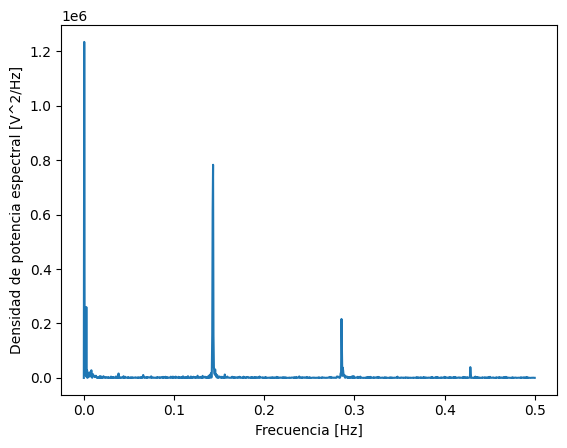

In [157]:

# Graficar el espectro de potencia

plt.plot(f,Pxx,)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de potencia espectral [V^2/Hz]')
plt.show()


## Suavizar la curva

/tmp/ipykernel_38440/4186750035.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


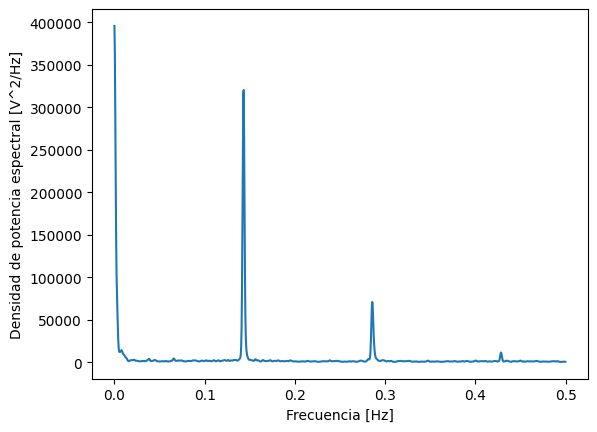

In [158]:
from scipy.signal import argrelextrema
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import find_peaks


y_suave = gaussian_filter1d(Pxx, sigma=2, truncate=3)

plt.plot(f,y_suave,)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de potencia espectral [V^2/Hz]')
plt.show()

## Encontremos los 3 maximos

In [187]:
indices_max = np.argsort(y_suave)[-20:]
print(f'Los 3 maximos locales se encuetran el los indices 309 y 617 ')
y_suave[indices_max]
print(f'Las frecuencias mas significativas son {f[309]} y {f[617]}')

Los 3 maximos locales se encuetran el los indices 309 y 617 
Las frecuencias mas significativas son 0.14325452016689846 y 0.2860454334724154


$\omega = 0.14325 \approx 1/7$ Es decir una frecuencia semanal